<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

# 線形分離可能(ソフトマージンSVM)

In [1]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# データの生成


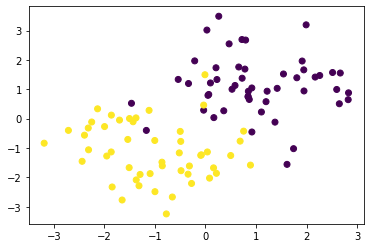

In [5]:
# 出力ラベルy = 0のデータを生成
X_train_0 = np.random.multivariate_normal(mean = [1, 1], 
                                          cov = [[1, -0.2], [-0.2, 1]], 
                                          size = 50)
y_train_0 = np.zeros(50)

# 出力ラベルy = 1のデータを生成
X_train_1 = np.random.multivariate_normal(mean = [-1, -1], 
                                          cov = [[1, -0.2], [-0.2, 1]], 
                                          size = 50)
y_train_1 = np.ones(50)

# 2種類のデータを結合する。
X_train = np.vstack((X_train_0, X_train_1))
y_train = np.hstack((y_train_0, y_train_1))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

In [15]:
# 入力の標準化
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [16]:
# インスタンス作成
svc_l= SVC(C = 1.0, kernel = "linear")
# fitメソッドで学習
svc_l.fit(X_train_sc, y_train)

SVC(kernel='linear')

# テストデータの入力を生成・予測

[1 1 1 ... 0 0 0]


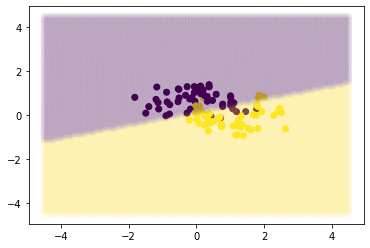

In [17]:
# 格子点上にデータ生成
xx, yy = np.meshgrid(
    np.linspace(start = -4.5, stop = 4.5, num = 100), 
    np.linspace(start = -4.5, stop = 4.5, num = 100))
X_test = np.c_[xx.ravel(), yy.ravel()]
# 入力の標準化
X_test_sc = sc.transform(X_test)
# 出力ラベルの予測
y_pred = svc_l.predict(X_test_sc)
print(y_pred)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, alpha = 0.05)
plt.show()

# 線形分離不可能(カーネルSVM)

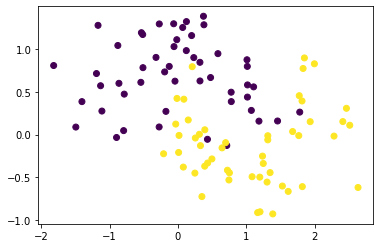

In [12]:
X_train, y_train = make_moons(n_samples = 100, noise = 0.3, random_state = 10)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

In [13]:
pipe_k = make_pipeline(StandardScaler(),
                     SVC(C=1.0, kernel="rbf", gamma=100.00)
                    )
pipe_k.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=100.0))])

[0 0 0 ... 0 0 0]


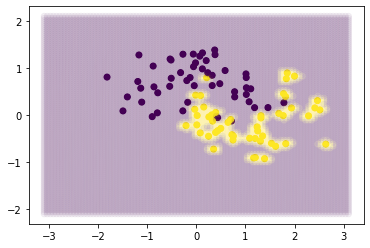

In [14]:
# 格子点上にデータを生成する。
xx, yy = np.meshgrid(
    np.linspace(start = -3.1, stop = 3.1, num = 100), 
    np.linspace(start = -2.1, stop = 2.1, num = 100))
X_test = np.c_[xx.ravel(), yy.ravel()]

# 出力ラベルの予測
y_pred = pipe_k.predict(X_test)    # predictメソッド：予測ラベルの計算
print(y_pred)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, alpha = 0.05)
plt.show()